# ĐỒ ÁN CUỐI KÌ

## NHÓM 11: 
- 19127476 : Trần Thị Huế Minh
- 19127486: Nguyễn Lê Nguyên
- 19127125 : Lê Duy Dũng

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from tabulate import tabulate
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

## I. Quan sát dữ liệu

In [68]:
df = pd.read_csv("data.csv")
df

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>
0,VCB,20170103,26.1847,27.5823,26.1847,27.3984,2018750
1,VCB,20170104,27.5823,27.6558,27.0674,27.2145,1339740
2,VCB,20170105,27.1409,27.4351,27.1042,27.3248,855250
3,VCB,20170106,27.3616,28.2442,27.2880,27.8765,2495910
4,VCB,20170109,28.0971,28.6488,28.0236,28.4649,2379510
...,...,...,...,...,...,...,...
15378,TCB,20230417,29.0000,29.4500,28.7500,29.4500,3014200
15379,TCB,20230418,29.4000,29.4000,28.9000,29.1500,2553900
15380,TCB,20230419,29.2000,29.4000,29.0000,29.0000,2611900
15381,TCB,20230420,28.9000,29.0000,28.5500,28.8000,2124700


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15383 entries, 0 to 15382
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <Ticker>      15383 non-null  object 
 1   <DTYYYYMMDD>  15383 non-null  int64  
 2   <OpenFixed>   15383 non-null  float64
 3   <HighFixed>   15383 non-null  float64
 4   <LowFixed>    15383 non-null  float64
 5   <CloseFixed>  15383 non-null  float64
 6   <Volume>      15383 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 841.4+ KB


In [70]:
df.columns

Index(['<Ticker>', '<DTYYYYMMDD>', '<OpenFixed>', '<HighFixed>', '<LowFixed>',
       '<CloseFixed>', '<Volume>'],
      dtype='object')

### Nhận xét:
- Dữ liệu có 7 cột, trong đó:
    - Ticker : Mã cổ phiếu của các ngân hàng
    - DTYYYYMMDD : Ngày được ghi nhận.
    - OpenFixed : Giá mở là giá của một cổ phiếu, chứng khoán hoặc sản phẩm tài chính khác khi phiên giao dịch bắt đầu. Đây là giá đầu tiên được đưa ra trong ngày giao dịch
    - HighFixed : Giá đỉnh là giá cao nhất mà một cổ phiếu, chứng khoán hoặc sản phẩm tài chính khác đạt được trong một phiên giao dịch.
    - LowFixed : Giá sàn là giá thấp nhất mà một cổ phiếu, chứng khoán hoặc sản phẩm tài chính khác đạt được trong một phiên giao dịch.
    - CloseFixed : Giá đóng là giá của một cổ phiếu, chứng khoán hoặc sản phẩm tài chính khác khi phiên giao dịch kết thúc. Đây là giá cuối cùng được đưa ra trong ngày giao dịch.
    - Volume : TKhối lượng giao dịch là tổng số lượng cổ phiếu, chứng khoán hoặc sản phẩm tài chính khác được giao dịch trong một phiên giao dịch. Đây là một chỉ số quan trọng để đo lường sự sôi động của thị trường và khối lượng lớn nhỏ của giao dịch có thể ảnh hưởng đến giá của một sản phẩm tài chính.


In [71]:
print("Số lượng dòng:", df.shape[0])
print("Số lượng cột:", df.shape[1])
print("Số lượng cổ phiếu:", df['<Ticker>'].nunique())
print("Số ngày lấy dữ liệu:", df['<DTYYYYMMDD>'].nunique())

Số lượng dòng: 15383
Số lượng cột: 7
Số lượng cổ phiếu: 10
Số ngày lấy dữ liệu: 1575


In [72]:
 df['<Ticker>'].unique()

array(['VCB', 'ACB', 'MBB', 'FPT', 'MSN', 'SAB', 'HPG', 'GAS', 'BID',
       'TCB'], dtype=object)

### 10 mã cổ phiếu khác nhau bao gồm:
- ACB: Ngân hàng thương mại cổ phần Á Châu
- BID: Ngân hàng TMCP Đầu tư và Phát triển Việt Nam
- FPT: Tập đoàn FPT
- GAS: Tổng Công ty Khí Việt Nam - CTCP
- HPG: Tập đoàn Hòa Phát
- MBB: Ngân hàng TMCP Quân Đội
- MSN: CTCP Tập đoàn Masan
- SAB: Tổng Công ty cổ phần Bia - Rượu - Nước giải khát Sài Gòn
- TCB: Ngân hàng Thương mại cổ phần Kỹ Thương Việt Nam
- VCB: Ngân hàng thương mại cổ phần Ngoại thương Việt Nam


In [73]:
#Xóa cột thời gian để thực hiện thống kê mô tả
df2 = df.drop('<DTYYYYMMDD>', axis=1)

# 2. Thống kê mô tả

## Thống kê mô tả toàn bộ dữ liệu

In [74]:
statistics = df2.describe()

# Tính Variance và Median
variance = df2.var(numeric_only=True)  # Tính Variance cho mỗi cột
median = df2.median(numeric_only=True)  # Tính Median cho mỗi cột

# Thêm cột "Variance" và "Median" vào statistics
statistics.loc['Variance'] = variance
statistics.loc['Median'] = median
statistics

,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>
count,15383.000000,15383.000000,15383.000000,15383.000000,1.538300e+04
mean,57.018182,57.779522,56.255356,57.015905,3.902440e+06
std,54.520037,55.178253,53.776732,54.492360,6.584123e+06
min,5.298800,5.688000,5.298800,5.688000,0.000000e+00
25%,20.400000,20.681150,20.112000,20.400000,6.459000e+05
50%,34.670900,35.149300,34.200000,34.662600,1.543500e+06
75%,77.032100,77.883700,76.000000,76.954600,3.916535e+06
max,305.390400,310.036500,294.847400,302.888700,9.965880e+07
Variance,2972.434434,3044.639589,2891.936907,2969.417313,4.335067e+13
Median,34.670900,35.149300,34.200000,34.662600,1.543500e+06


### Nhận xét:
- Ở đây ta tập trung vào giá đóng và khối lượng giao dịch vì đây là dữ liệu quan trọng trong việc phân tích dữ liệu giá cổ phiếu:
    - Giá đóng trung bình là 57.015905 VNĐ
    - Khối lượng giao dịch trung bình mỗi ngày là 3,902,440
##### Variance của dữ liệu cho từng cột là rất cao, suy ra dữ liệu phân tán rộng và không gần giá trị trung bình. Vì vậy sau đây là thống kê mô tả cho từng cổ phiếu

## Thống kê mô tả theo từng mã cổ phiếu

In [75]:
tickers = ['VCB', 'ACB', 'BID', 'FPT', 'GAS', 'HPG', 'MBB', 'MSN', 'SAB', 'TCB']
df2 = df.drop('<DTYYYYMMDD>', axis=1)
for i in tickers:
    print(i,'\n')
    df_subset = df2[df2['<Ticker>'] == i]
    statistic = df_subset.describe()

    variance = df_subset.var(numeric_only=True) 
    median = df_subset.median(numeric_only=True)  

    statistic.loc['Variance'] = variance
    statistic.loc['Median'] = median
    
    print(statistic,'\n')
    

VCB 

          <OpenFixed>  <HighFixed>   <LowFixed>  <CloseFixed>      <Volume>
count     1573.000000  1573.000000  1573.000000   1573.000000  1.573000e+03
mean        59.958217    60.698851    59.226411     59.992508  1.366186e+06
std         19.102602    19.321334    18.829756     19.096270  8.621718e+05
min         25.596300    25.890500    25.522800     25.633100  1.414500e+05
25%         44.036300    44.923600    43.585400     44.222200  7.757700e+05
50%         63.737800    64.121800    63.123500     63.661000  1.151200e+06
75%         76.100000    76.954600    75.174000     76.025600  1.701570e+06
max         95.800000    96.300000    94.000000     96.000000  6.724710e+06
Variance   364.909404   373.313929   354.559703    364.667535  7.433401e+11
Median      63.737800    64.121800    63.123500     63.661000  1.151200e+06 

ACB 

          <OpenFixed>  <HighFixed>   <LowFixed>  <CloseFixed>      <Volume>
count     1575.000000  1575.000000  1575.000000   1575.000000  1.575000e+0

### Nhận xét: 
- Nhìn chung giá đóng trung bình của cổ phiếu SAB là cao nhất so với các cổ phiếu còn lại
- Tuy nhiên về độ lệch về giá và volume của một số cổ phiếu là khá cao như VCB, FPT, GAS, MSN, SAB, TCB

## Boxplot: Biểu đồ phân bố dữ liệu

### Quan sát độ phân bố dữ liệu của các cột giá mở, giá đóng, giá cao, giá thấp của toàn bộ dữ liệu

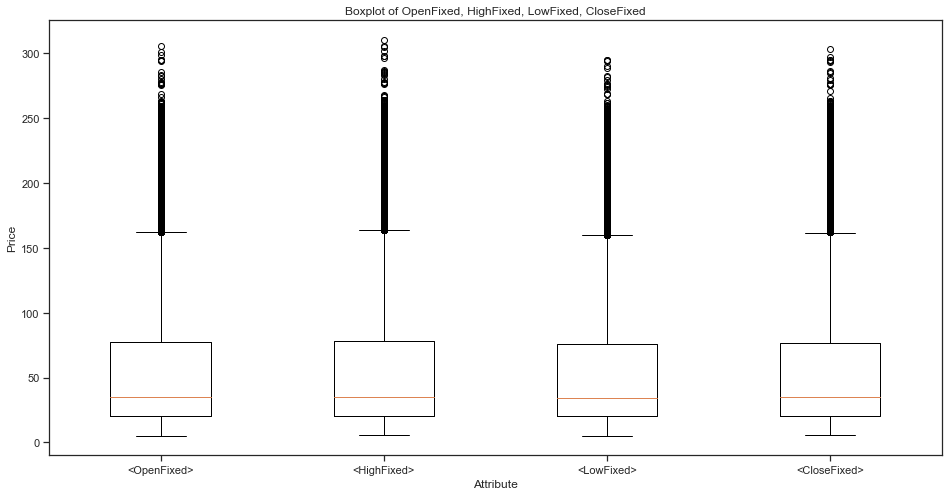

In [76]:
plt.figure(figsize=(16,8))
column = ['<OpenFixed>', '<HighFixed>', '<LowFixed>', '<CloseFixed>']
plt.boxplot(df2[column])
plt.xticks([1, 2, 3, 4], column)
plt.ylabel('Price')
plt.xlabel('Attribute')
plt.title('Boxplot of OpenFixed, HighFixed, LowFixed, CloseFixed')
plt.show()

#### Nhận xét: 
- Về các loại giá của cổ phiếu có sự tập trung từ khoảng 25 đến 80 ngàn đồng
- Tuy nhiên, có rất nhiều điểm ngoại lệ xuất hiện cao trên mức 150 ngàn đến hơn 300 ngàn đồng
- Không có quá nhiều sự chêch lệch giữa trung vị của các loại giá, nghĩa là giữa giá đóng, giá mở, và giá cao - thấp trong ngày ít có sự thay đổi lớn.

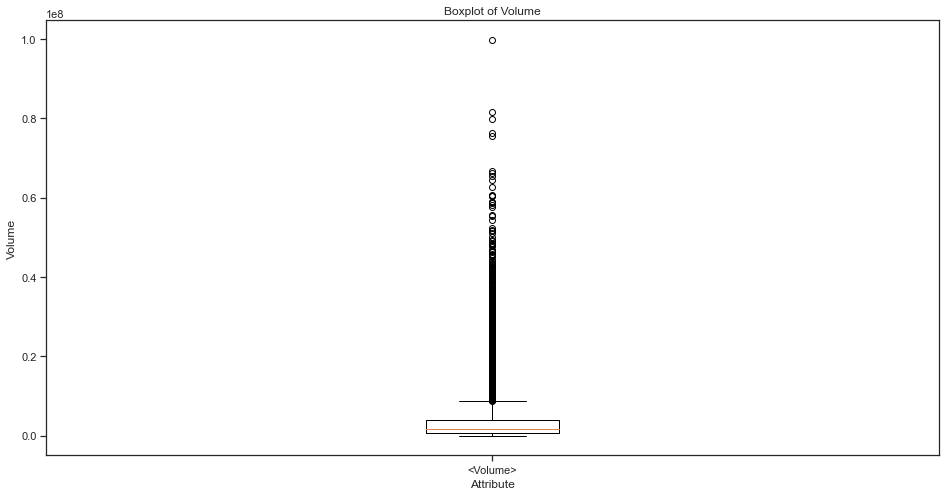

In [77]:
plt.figure(figsize=(16,8))
plt.boxplot(df2['<Volume>'])
plt.xticks([1],['<Volume>'])
plt.ylabel('Volume')
plt.xlabel('Attribute')
plt.title('Boxplot of Volume')
plt.show()

#### Nhận xét:
- Khối lượng giao dịch phần lớn là dưới 10000000 lượt giao dịch, nhưng các điểm ngoại lệ cũng rất nhiều: có những ngày giao dịch của một cổ phiếu lên đến 100000000, gấp 10 lần so với lượt giao dịch trung vị 

### Quan sát độ phân bố dữ liệu của các cột theo từng cổ phiếu

#### Volume

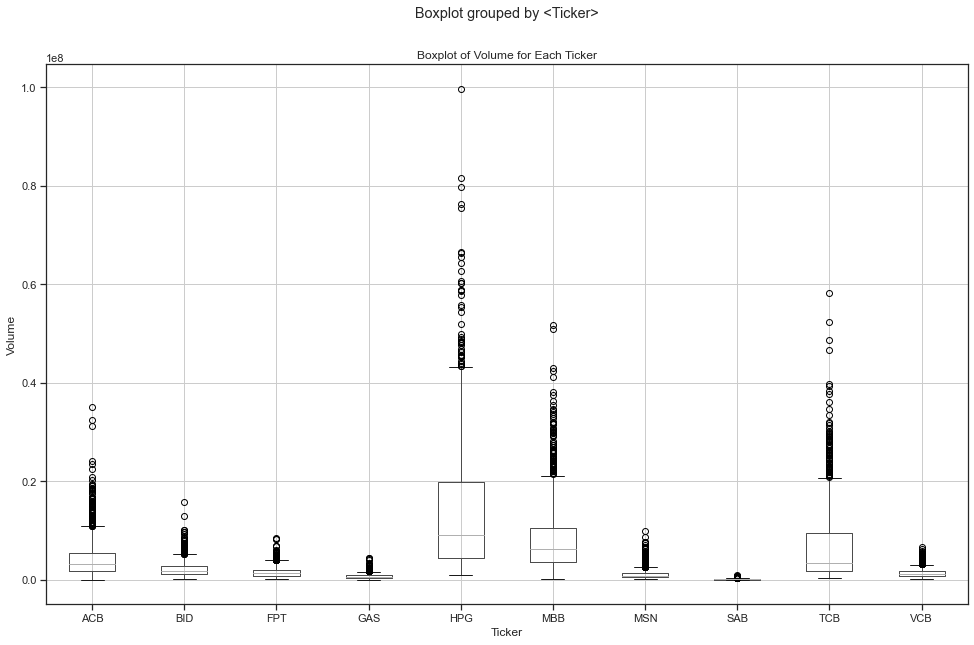

In [78]:
filtered_df = df2[df2['<Ticker>'].isin(tickers)]

filtered_df.boxplot(column='<Volume>', by='<Ticker>', figsize=(16, 10))
plt.title('Boxplot of Volume for Each Ticker')
plt.xlabel('Ticker')
plt.ylabel('Volume')

# Display the plot
plt.show()


#### Nhận xét:
- Quan sát ta thấy HPG có khối lượng giao dịch cao hơn hẳn so với các loại cổ phiếu còn lại và khối lượng giao dịch cao nhất cũng đến từ cổ phiếu HPG

#### OpenFixed

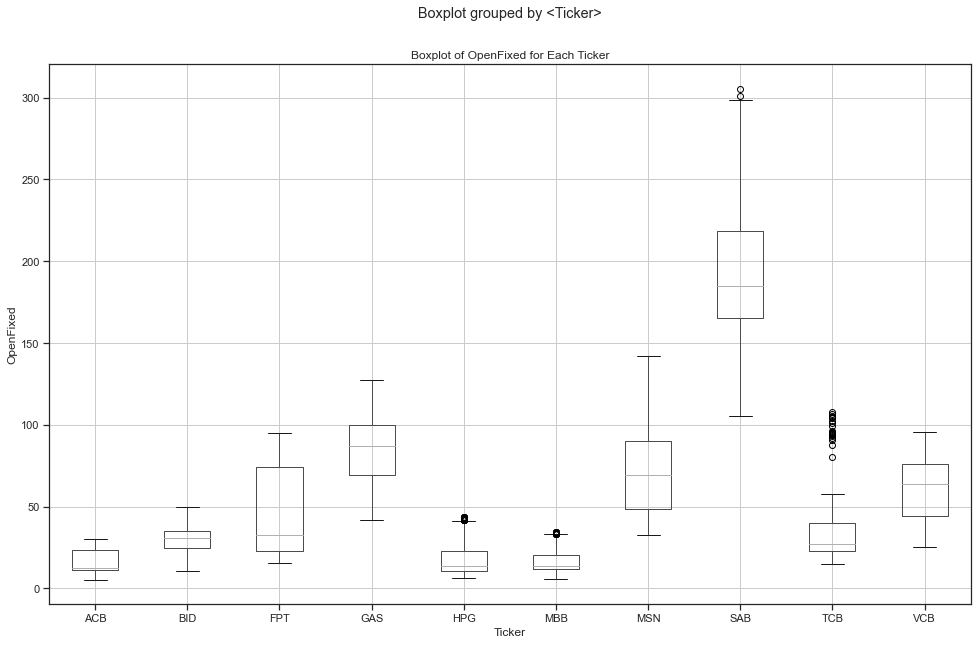

In [79]:
filtered_df = df2[df2['<Ticker>'].isin(tickers)]

filtered_df.boxplot(column='<OpenFixed>', by='<Ticker>', figsize=(16, 10))
plt.title('Boxplot of OpenFixed for Each Ticker')
plt.xlabel('Ticker')
plt.ylabel('OpenFixed')

# Display the plot
plt.show()


#### HighFixed

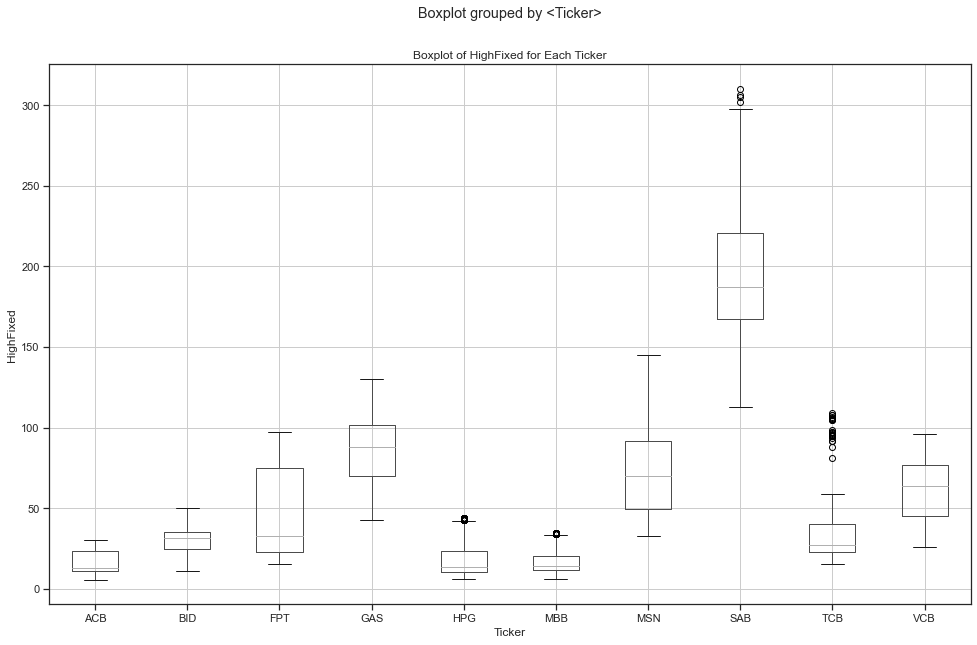

In [80]:
filtered_df = df2[df2['<Ticker>'].isin(tickers)]

filtered_df.boxplot(column='<HighFixed>', by='<Ticker>', figsize=(16, 10))
plt.title('Boxplot of HighFixed for Each Ticker')
plt.xlabel('Ticker')
plt.ylabel('HighFixed')

# Display the plot
plt.show()

In [81]:
#### LowFixed

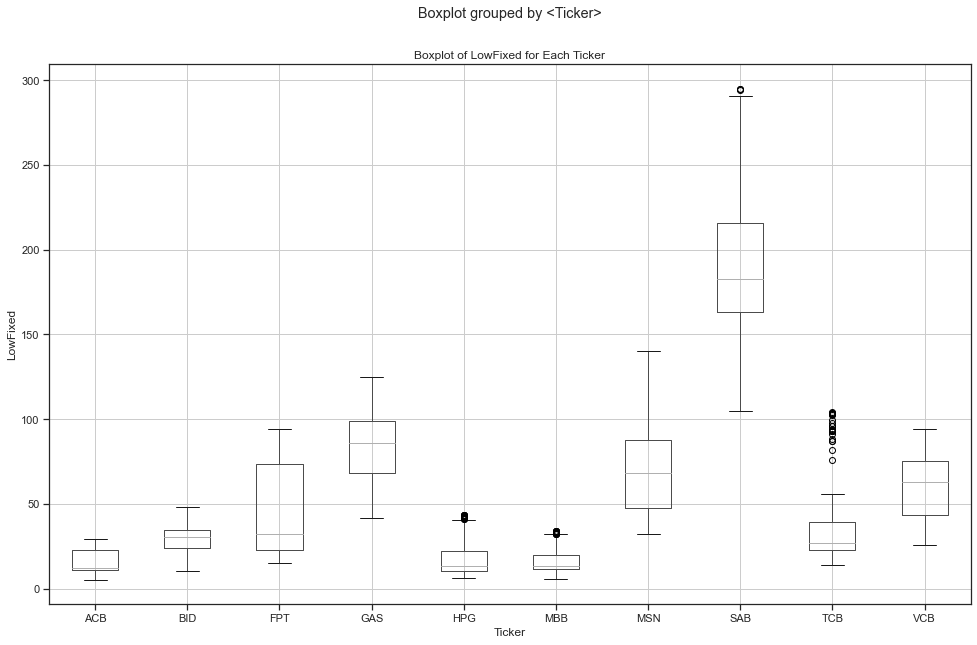

In [82]:
filtered_df = df2[df2['<Ticker>'].isin(tickers)]

filtered_df.boxplot(column='<LowFixed>', by='<Ticker>', figsize=(16, 10))
plt.title('Boxplot of LowFixed for Each Ticker')
plt.xlabel('Ticker')
plt.ylabel('LowFixed')

# Display the plot
plt.show()

#### CloseFixed

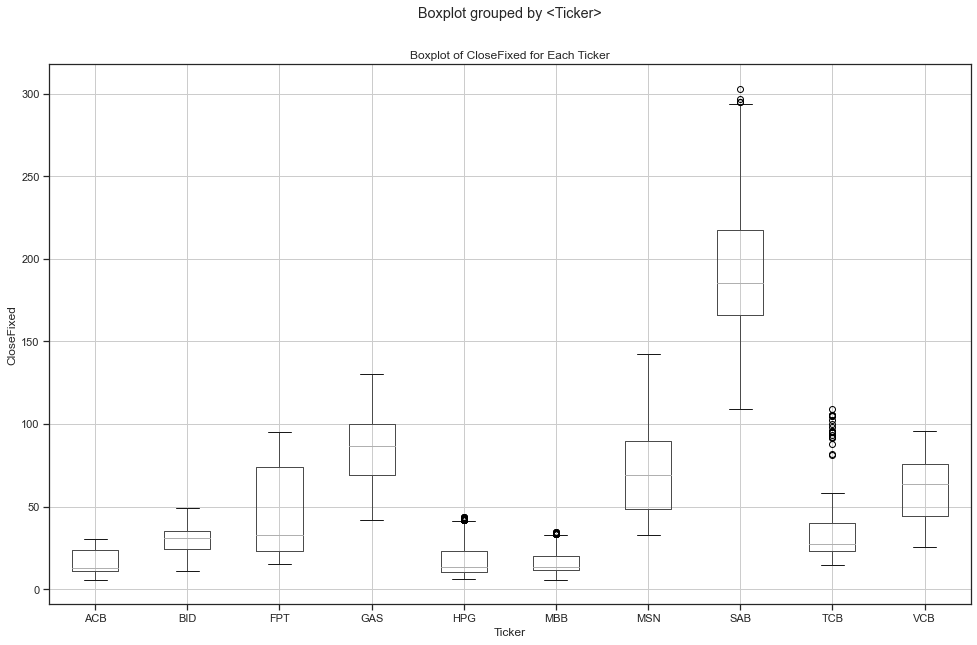

In [83]:
filtered_df = df2[df2['<Ticker>'].isin(tickers)]

filtered_df.boxplot(column='<CloseFixed>', by='<Ticker>', figsize=(16, 10))
plt.title('Boxplot of CloseFixed for Each Ticker')
plt.xlabel('Ticker')
plt.ylabel('CloseFixed')

# Display the plot
plt.show()

#### Nhận xét:
- Về giá, SAB là cổ phiếu có giá cao nhất so với các loại cổ phiếu còn lại

## Histogram: Biểu đồ tần xuất

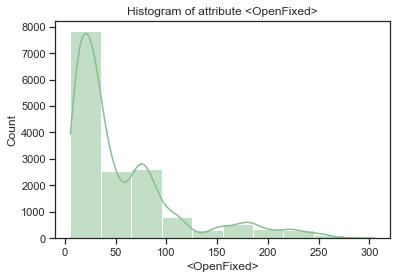

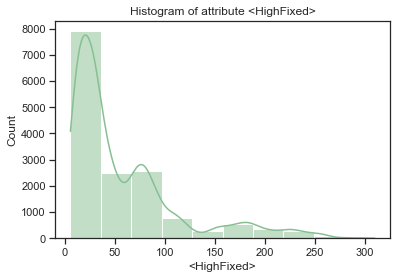

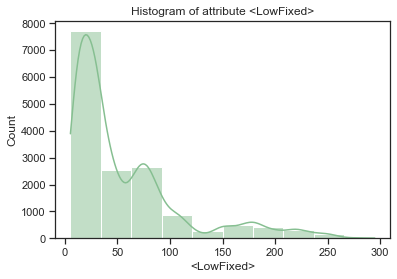

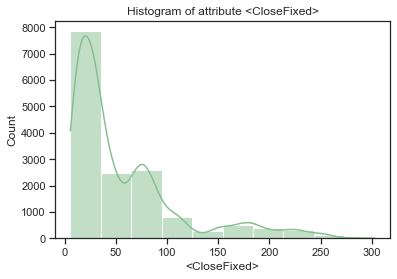

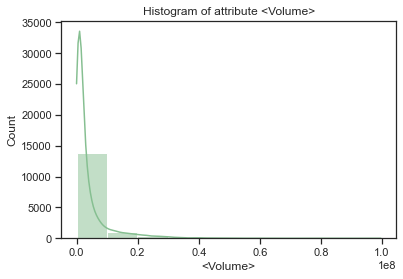

In [84]:
names = df2.columns
for col in names[1:]:
    sns.histplot(data=df2, x=col, bins=10, kde=True, color='#86bf91', fill=True)
    plt.title("Histogram of attribute " + col)
    plt.show()

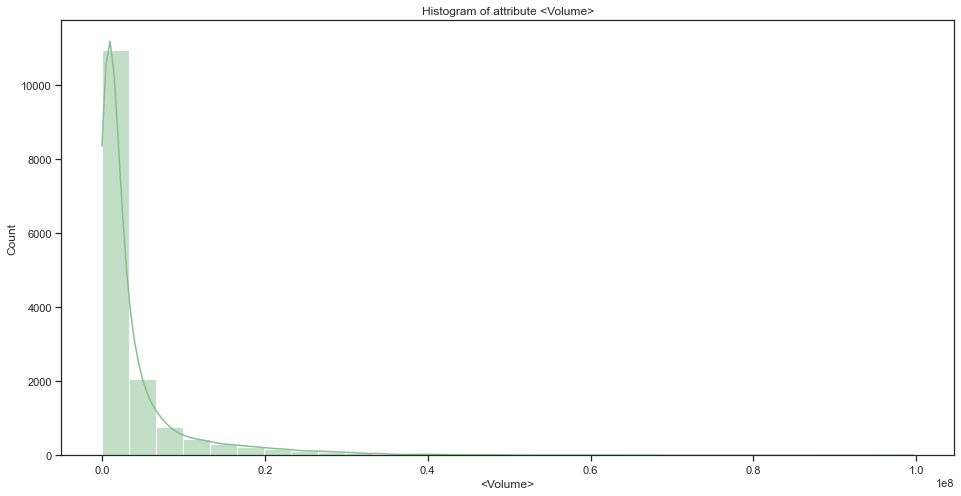

In [85]:
plt.figure(figsize=(16,8))
sns.histplot(data=df2, x='<Volume>', bins=30, kde=True, color='#86bf91', fill=True)
plt.title("Histogram of attribute " + col)
plt.show()

# 3. Phân tích dữ liệu đơn giản

## Heatmap

### Quan sát mối tương quan giữa các biến trong toàn bộ dữ liệu

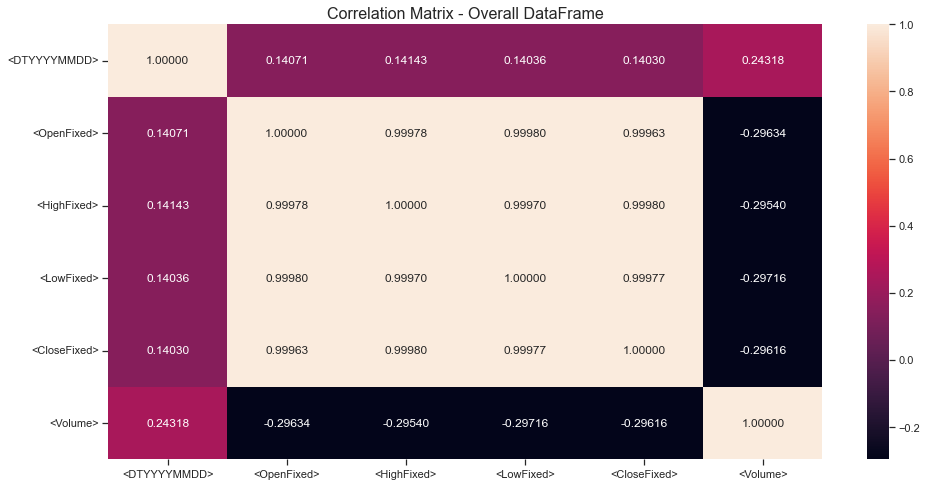

In [86]:
# Correlation heatmap for the overall DataFrame
plt.figure(figsize=(16,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".5f")
plt.title('Correlation Matrix - Overall DataFrame', size=16)
plt.show()

### Nhận xét:
- Nhìn vào biểu đồ ta thấy OpenFixed, HighFixed, LowFixed, CloseFixed có sự tương quan dương cao
- Volume nhìn chung có sự tương quan âm đối với các loại giá nhưng không lớn

## Quan sát mối tương quan giữa các biến đối với từng Mã cổ phiếu

In [87]:
vcb_df = df.loc[df['<Ticker>'] == 'VCB']
acb_df = df.loc[df['<Ticker>'] == 'ACB']
bid_df = df.loc[df['<Ticker>'] == 'BID']
fpt_df = df.loc[df['<Ticker>'] == 'FPT']
gas_df = df.loc[df['<Ticker>'] == 'GAS']
hpg_df = df.loc[df['<Ticker>'] == 'HPG']
mbb_df = df.loc[df['<Ticker>'] == 'MBB']
msn_df = df.loc[df['<Ticker>'] == 'MSN']
sab_df = df.loc[df['<Ticker>'] == 'SAB']
tcb_df = df.loc[df['<Ticker>'] == 'TCB']

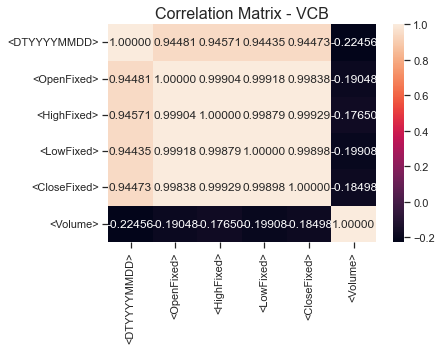

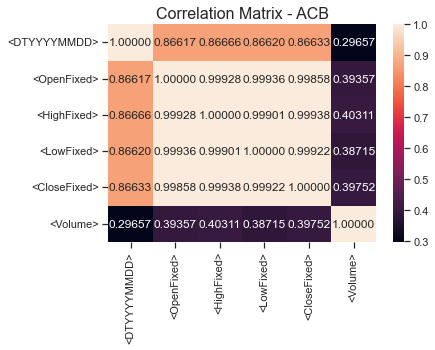

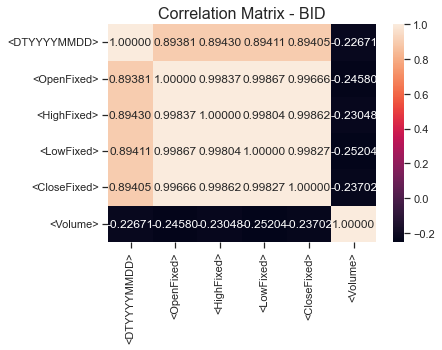

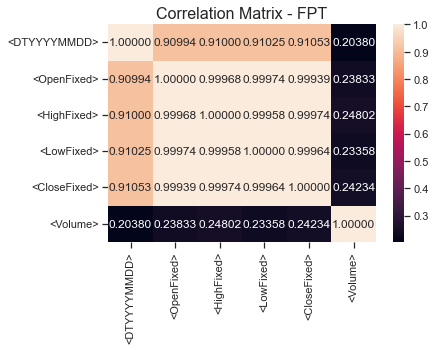

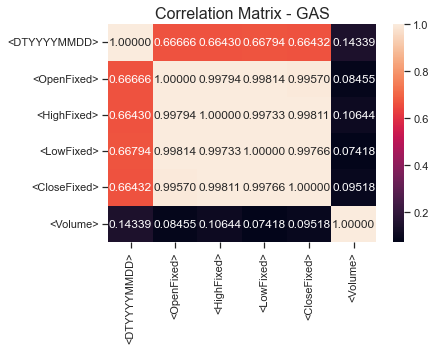

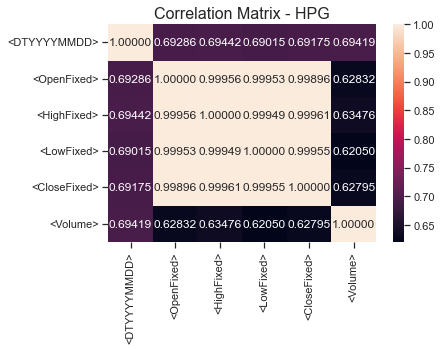

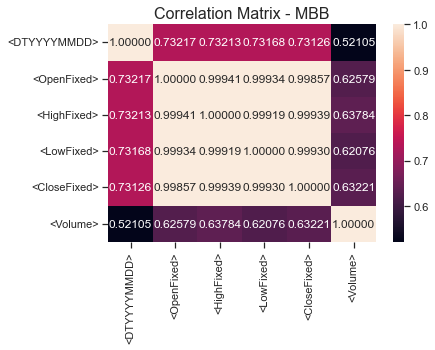

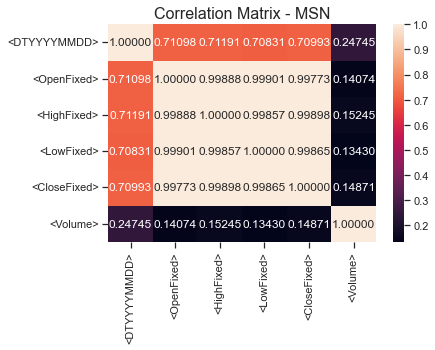

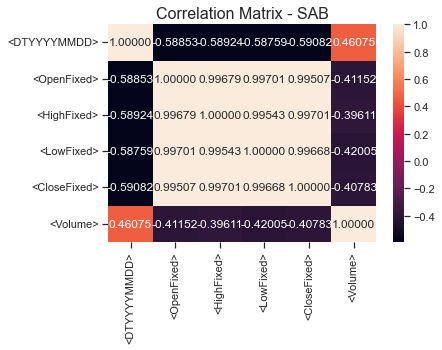

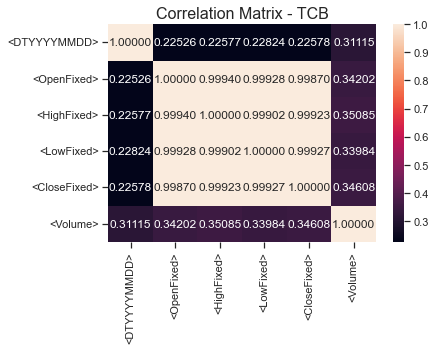

In [88]:
bank_dfs = [vcb_df, acb_df, bid_df, fpt_df, gas_df, hpg_df, mbb_df, msn_df, sab_df, tcb_df]
tickers = ['VCB', 'ACB', 'BID', 'FPT', 'GAS', 'HPG', 'MBB', 'MSN', 'SAB', 'TCB']

for df2, ticker in zip(bank_dfs, tickers):
    corr = df2.corr()
    sns.heatmap(corr, annot=True, fmt=".5f")
    plt.title(f'Correlation Matrix - {ticker}', size=16)
    plt.show()

### Nhận xét:
- Đối với một số cổ phiếu cũng có sự tương quan cao giữa ngày và các loại giá. Tuy nhiên không phải toàn bộ loại cổ phiếu đều có mối quan tương quan giữa giá và thời gian

## Scatterplot

### Mối quan hệ của Giá mở và giá đóng

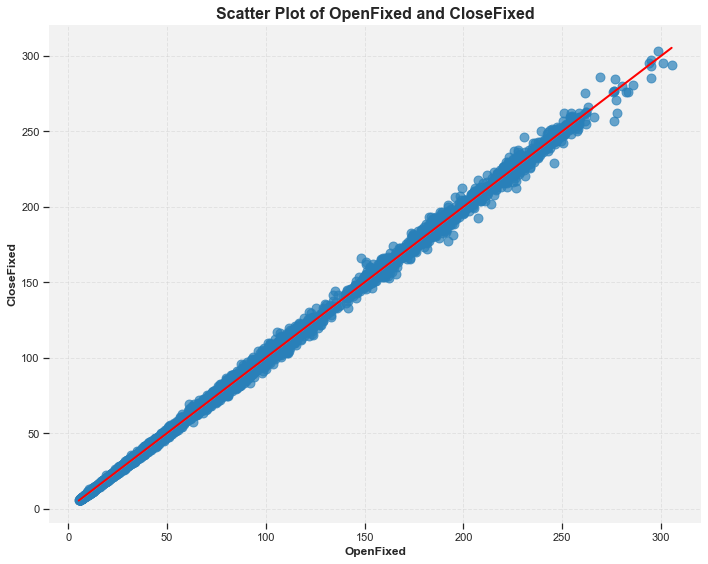

In [89]:

sns.set_theme(style="ticks")
scatter_plot = sns.lmplot(x="<OpenFixed>", y="<CloseFixed>", data=df, line_kws={"color": "red"},
                          scatter_kws={"color": "#2980B9", "alpha": 0.7, "s": 80})

plt.title("Scatter Plot of OpenFixed and CloseFixed", fontweight='bold', fontsize=16)
plt.xlabel("OpenFixed", fontweight='bold', fontsize=12)
plt.ylabel("CloseFixed", fontweight='bold', fontsize=12)


sns.despine(trim=True, left=True, bottom=True)
plt.grid(True, linestyle='--', alpha=0.4)

scatter_plot.ax.set_facecolor("#F2F2F2")

scatter_plot.ax.lines[0].set_color('red')
scatter_plot.ax.lines[0].set_linewidth(2)

scatter_plot.ax.collections[0].set_color('#2980B9')
scatter_plot.ax.collections[0].set_alpha(0.7)


scatter_plot.fig.set_size_inches(10, 8)

plt.tight_layout()
plt.show()

### Mối quan hệ giữa giá mở và khối lượng giao dịch

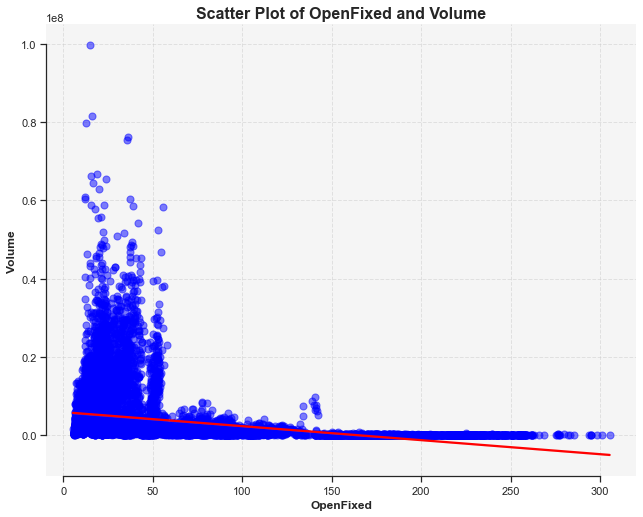

In [90]:
sns.set(style="ticks")
sns.lmplot(x="<OpenFixed>", y="<Volume>", data=df, line_kws={"color": "red"}, scatter_kws={"color": "blue", "alpha": 0.5, "s": 50})

plt.title("Scatter Plot of OpenFixed and Volume", fontweight='bold', fontsize=16)
plt.xlabel("OpenFixed", fontweight='bold', fontsize=12)
plt.ylabel("Volume", fontweight='bold', fontsize=12)

sns.despine(trim=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.gca().set_facecolor('#f5f5f5')

plt.gcf().set_size_inches(10, 8)
plt.show()

### Xét với từng cổ phiếu

#### Mối quan hệ của Giá mở và giá đóng của từng cổ phiếu

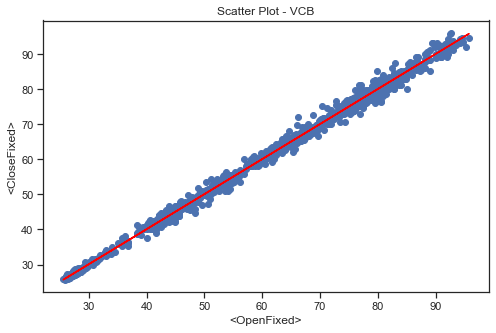

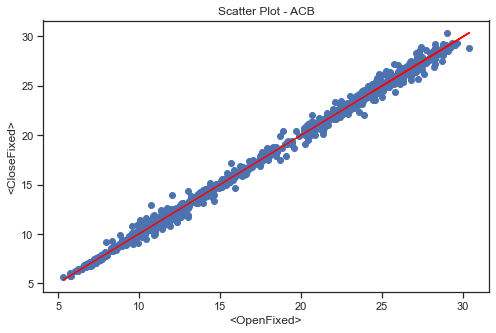

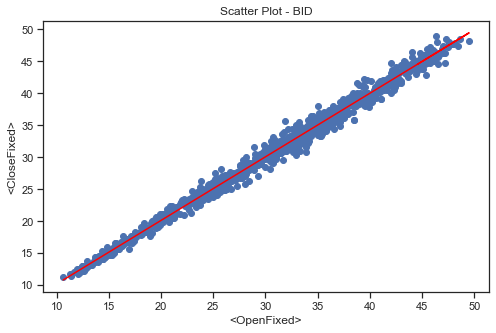

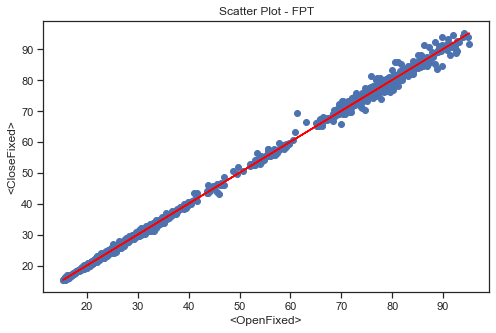

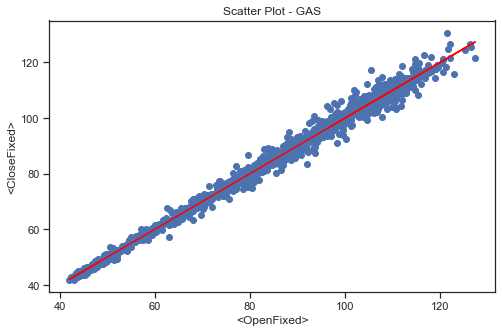

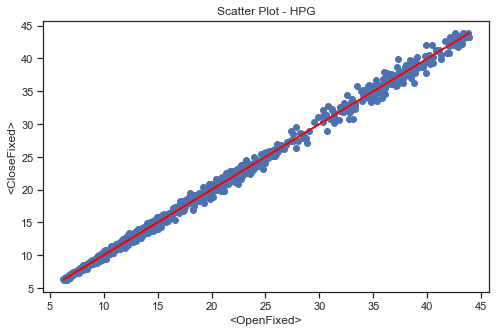

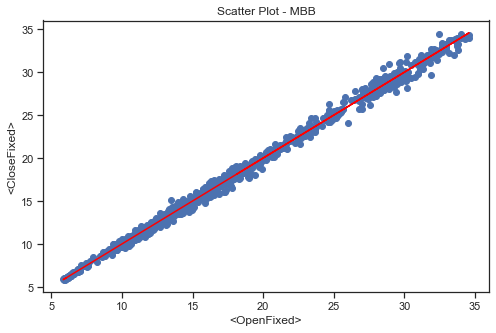

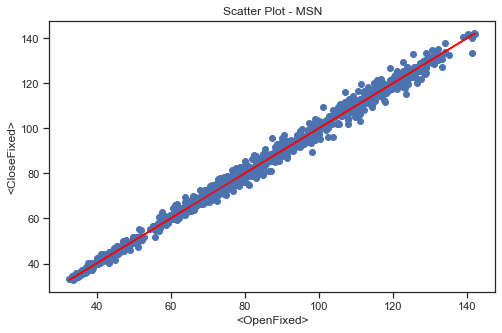

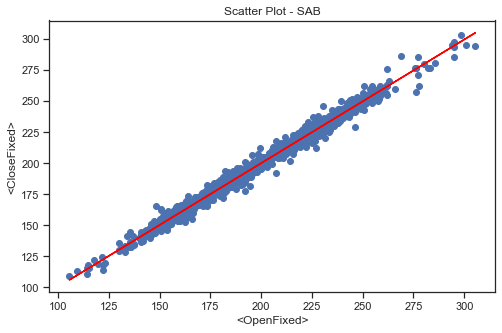

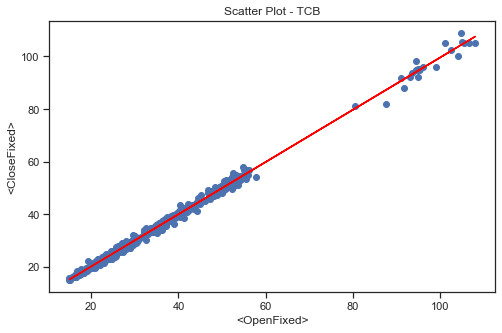

In [91]:
dataframes = [vcb_df, acb_df, bid_df, fpt_df, gas_df, hpg_df, mbb_df, msn_df, sab_df, tcb_df]
tickers = ['VCB', 'ACB', 'BID', 'FPT', 'GAS', 'HPG', 'MBB', 'MSN', 'SAB', 'TCB']

for df, ticker in zip(dataframes, tickers):
    plt.figure(figsize=(8, 5))
    plt.scatter(df['<OpenFixed>'], df['<CloseFixed>'])
    plt.xlabel('<OpenFixed>')
    plt.ylabel('<CloseFixed>')
    plt.title(f'Scatter Plot - {ticker}')
    
   
    regression_coefficients = np.polyfit(df['<OpenFixed>'], df['<CloseFixed>'], 1)
    regression_line = np.polyval(regression_coefficients, df['<OpenFixed>'])
    
    plt.plot(df['<OpenFixed>'], regression_line, color='red')
    
    plt.show()

#### Mối quan hệ của Giá mở và giá thấp của từng cổ phiếu

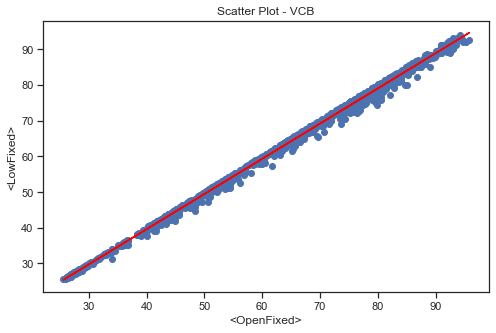

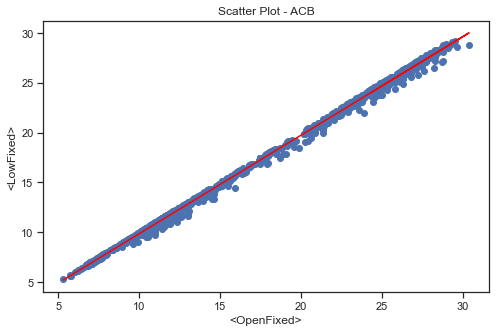

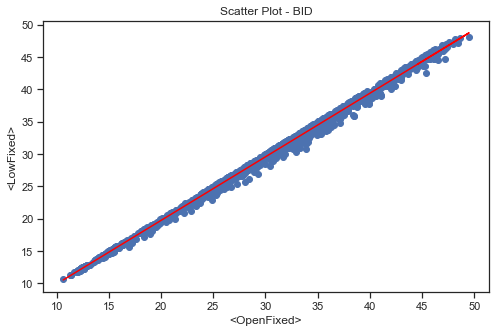

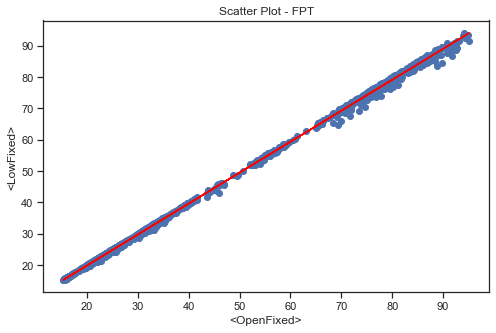

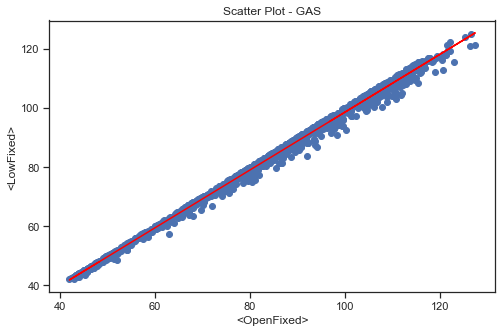

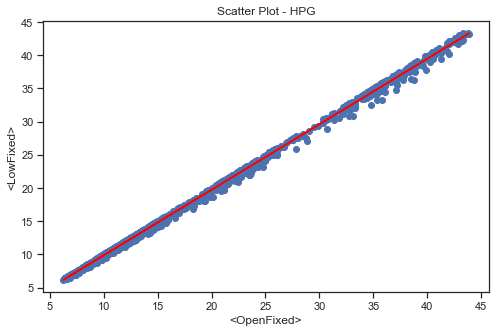

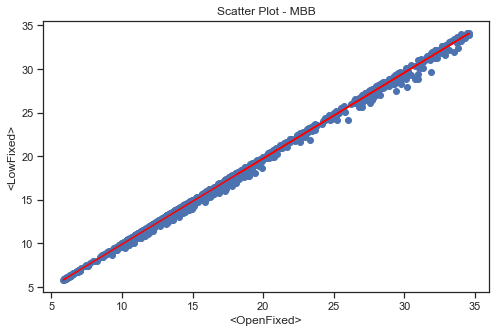

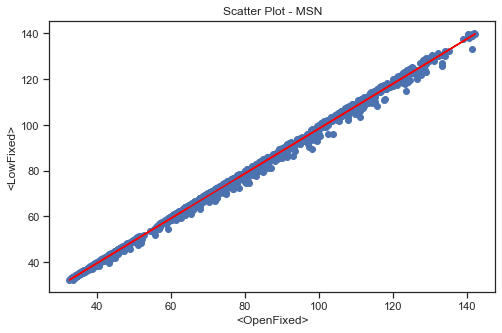

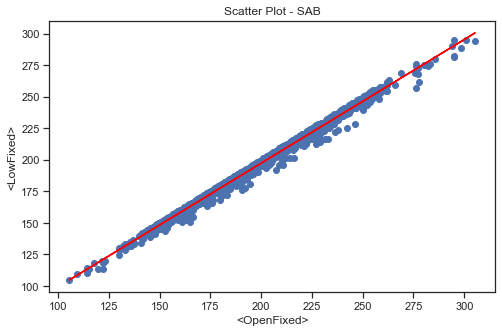

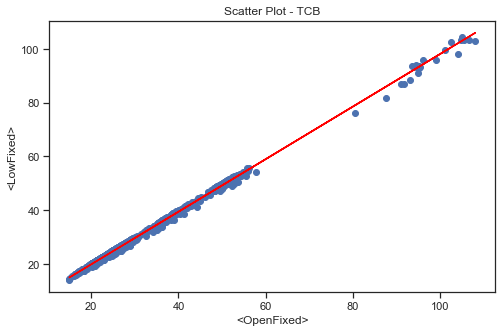

In [92]:
dataframes = [vcb_df, acb_df, bid_df, fpt_df, gas_df, hpg_df, mbb_df, msn_df, sab_df, tcb_df]
tickers = ['VCB', 'ACB', 'BID', 'FPT', 'GAS', 'HPG', 'MBB', 'MSN', 'SAB', 'TCB']

for df, ticker in zip(dataframes, tickers):
    plt.figure(figsize=(8, 5))
    plt.scatter(df['<OpenFixed>'], df['<LowFixed>'])
    plt.xlabel('<OpenFixed>')
    plt.ylabel('<LowFixed>')
    plt.title(f'Scatter Plot - {ticker}')
    
   
    regression_coefficients = np.polyfit(df['<OpenFixed>'], df['<LowFixed>'], 1)
    regression_line = np.polyval(regression_coefficients, df['<OpenFixed>'])
    
    plt.plot(df['<OpenFixed>'], regression_line, color='red')
    
    plt.show()

#### Mối quan hệ của Giá mở và giá cao của từng cổ phiếu

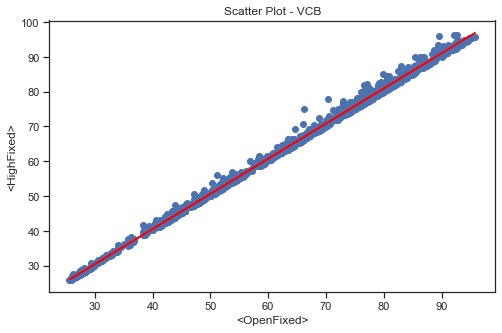

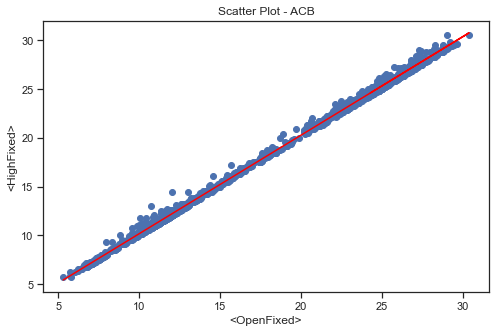

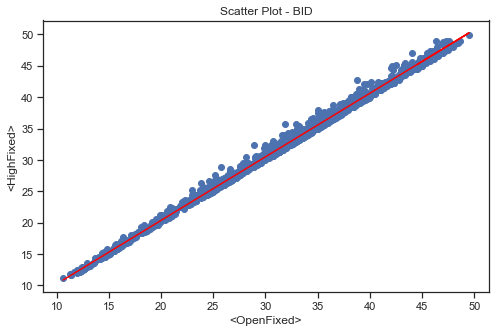

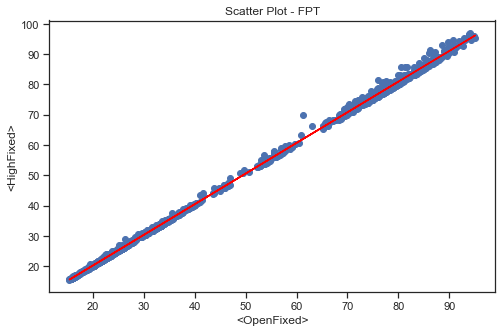

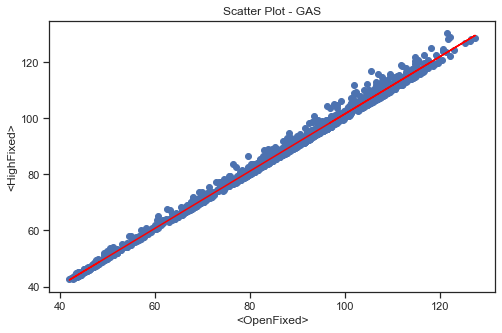

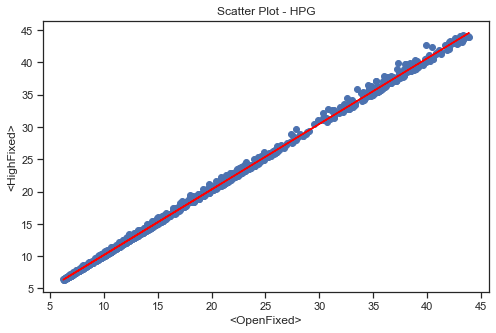

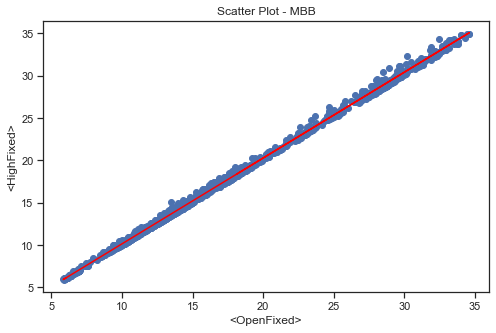

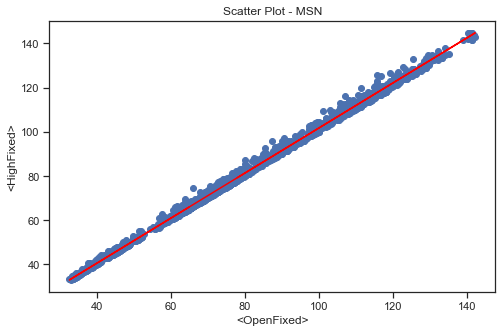

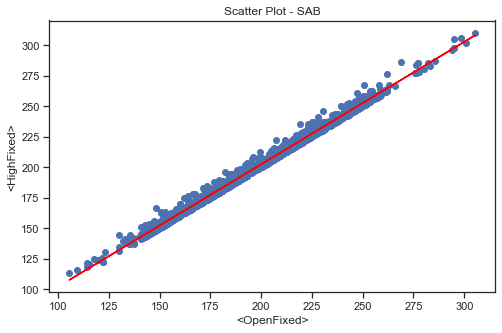

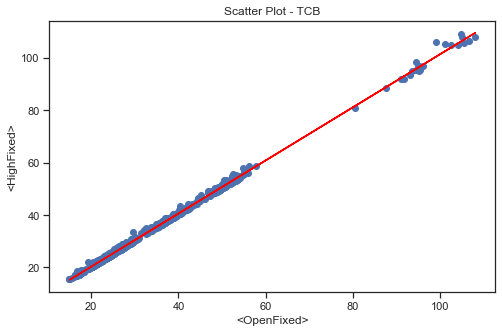

In [93]:
dataframes = [vcb_df, acb_df, bid_df, fpt_df, gas_df, hpg_df, mbb_df, msn_df, sab_df, tcb_df]
tickers = ['VCB', 'ACB', 'BID', 'FPT', 'GAS', 'HPG', 'MBB', 'MSN', 'SAB', 'TCB']

for df, ticker in zip(dataframes, tickers):
    plt.figure(figsize=(8, 5))
    plt.scatter(df['<OpenFixed>'], df['<HighFixed>'])
    plt.xlabel('<OpenFixed>')
    plt.ylabel('<HighFixed>')
    plt.title(f'Scatter Plot - {ticker}')
    
   
    regression_coefficients = np.polyfit(df['<OpenFixed>'], df['<HighFixed>'], 1)
    regression_line = np.polyval(regression_coefficients, df['<OpenFixed>'])
    
    plt.plot(df['<OpenFixed>'], regression_line, color='red')
    
    plt.show()

#### Mối quan hệ của Giá cao và giá thấp của từng cổ phiếu

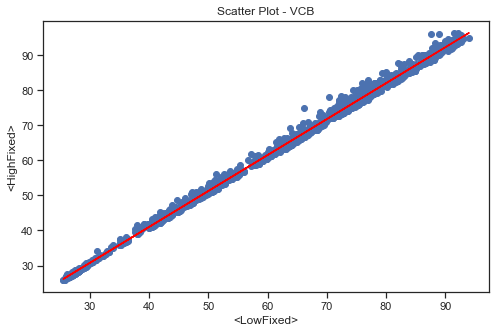

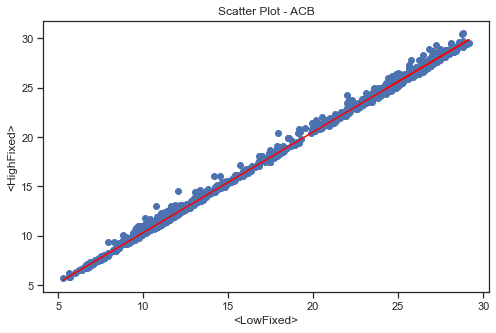

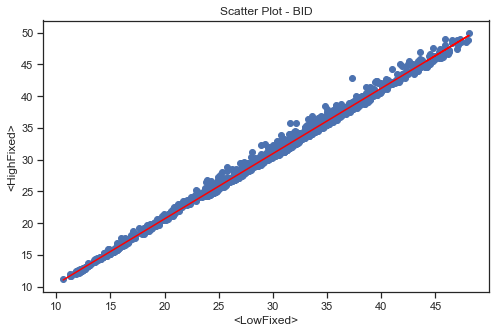

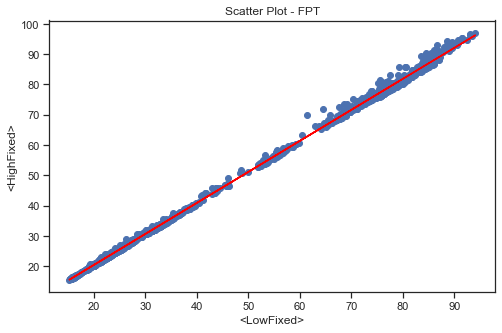

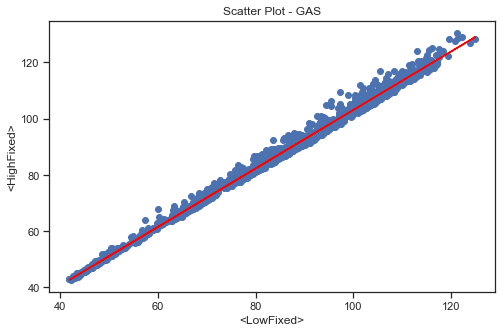

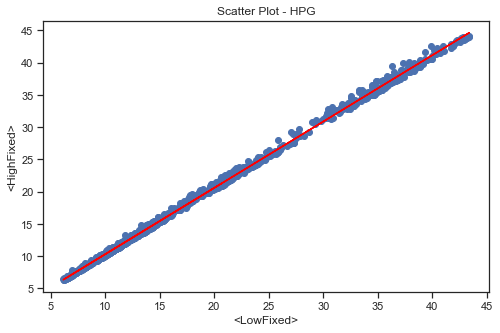

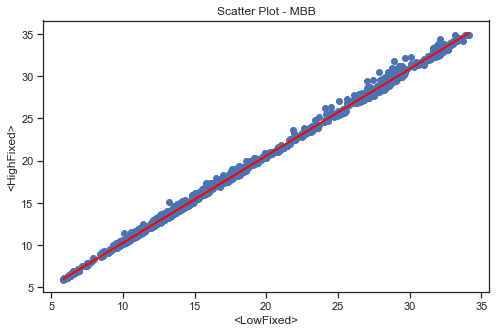

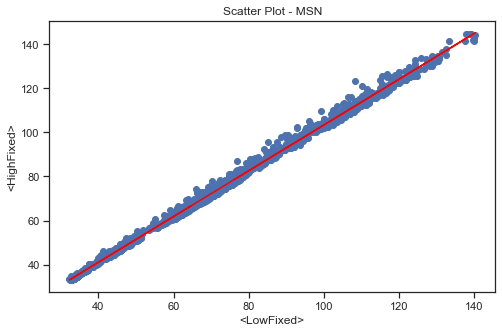

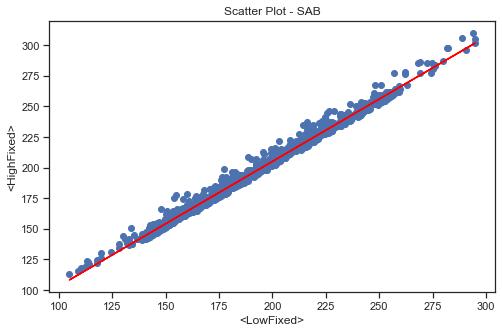

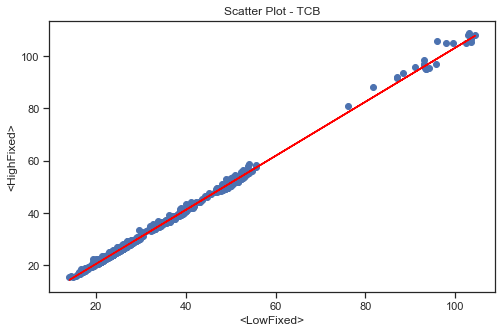

In [94]:
dataframes = [vcb_df, acb_df, bid_df, fpt_df, gas_df, hpg_df, mbb_df, msn_df, sab_df, tcb_df]
tickers = ['VCB', 'ACB', 'BID', 'FPT', 'GAS', 'HPG', 'MBB', 'MSN', 'SAB', 'TCB']

for df, ticker in zip(dataframes, tickers):
    plt.figure(figsize=(8, 5))
    plt.scatter(df['<LowFixed>'], df['<HighFixed>'])
    plt.xlabel('<LowFixed>')
    plt.ylabel('<HighFixed>')
    plt.title(f'Scatter Plot - {ticker}')
    
   
    regression_coefficients = np.polyfit(df['<LowFixed>'], df['<HighFixed>'], 1)
    regression_line = np.polyval(regression_coefficients, df['<LowFixed>'])
    
    plt.plot(df['<LowFixed>'], regression_line, color='red')
    
    plt.show()

### Nhận xét:
- Đúng như nhận xét trên, các loại giá tương quan đồng biến với nhau

#### Mối quan hệ của Ngày và giá đóng của từng cổ phiếu

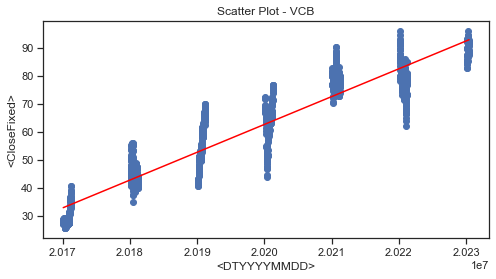

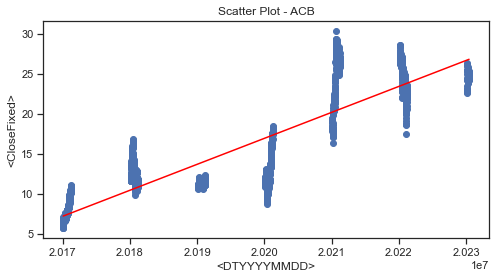

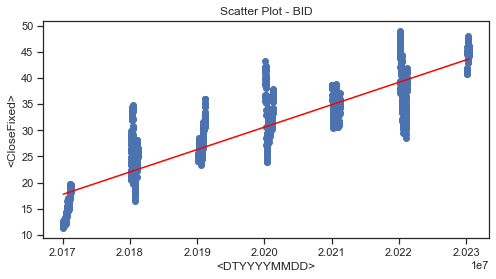

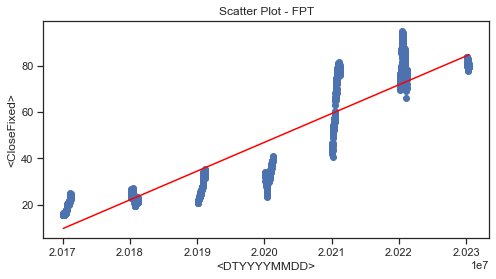

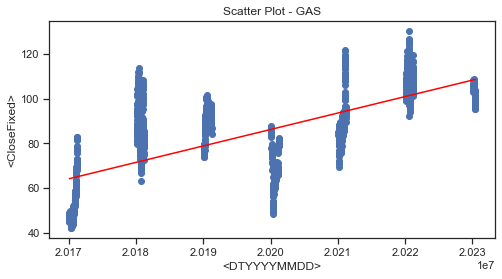

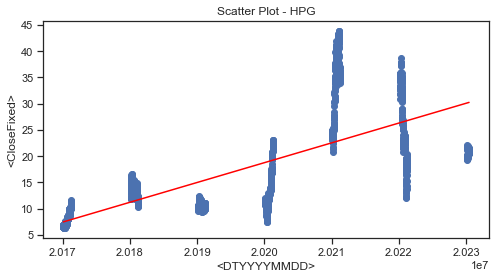

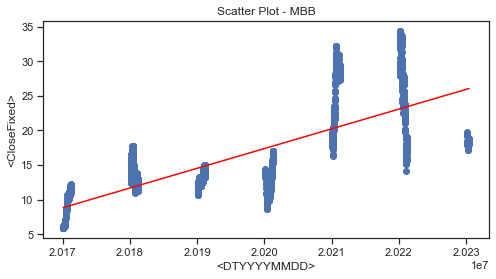

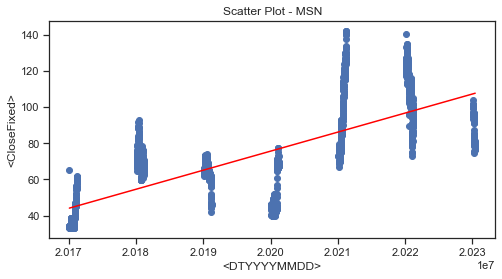

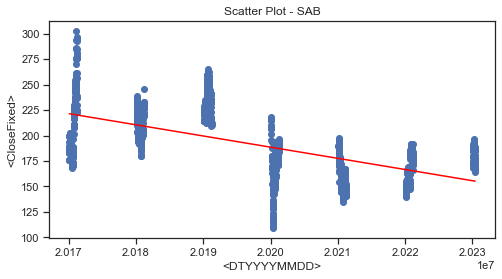

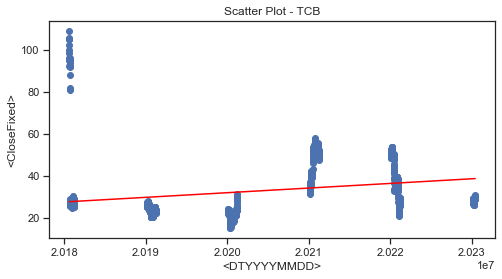

In [95]:
dataframes = [vcb_df, acb_df, bid_df, fpt_df, gas_df, hpg_df, mbb_df, msn_df, sab_df, tcb_df]
tickers = ['VCB', 'ACB', 'BID', 'FPT', 'GAS', 'HPG', 'MBB', 'MSN', 'SAB', 'TCB']

for df, ticker in zip(dataframes, tickers):
    plt.figure(figsize=(8, 4))
    plt.scatter(df['<DTYYYYMMDD>'], df['<CloseFixed>'])
    plt.xlabel('<DTYYYYMMDD>')
    plt.ylabel('<CloseFixed>')
    plt.title(f'Scatter Plot - {ticker}')
    
   
    regression_coefficients = np.polyfit(df['<DTYYYYMMDD>'], df['<CloseFixed>'], 1)
    regression_line = np.polyval(regression_coefficients, df['<DTYYYYMMDD>'])
    
    plt.plot(df['<DTYYYYMMDD>'], regression_line, color='red')
    
    plt.show()

### Nhận xét: 
- Một só cổ phiếu có sự tương quan đồng biến cao giữa giá mở và ngày như: VCB, BID, FPT
- Cổ phiếu có sự giảm giá mở theo thời gian là SAB

# 4. Phân tích hồi quy, giải thích và dự đoán

## Nhận xét:
Bởi vì dữ liệu phân tích là lịch sử giá và khối lượng giao dịch chứng khoán, vì vậy dù sự tương quan giữa giá và thời gian không thực sự cao, nhưng về thực tế thì việc dự đoán giá cổ phiếu theo thời gian là điều mà bất kì nhà đầu tư nào cũng sử dụng cùng với nhiều yếu tố khác để dự đoán được chính xác giá của một cổ phiếu trong tương lai.
- Vì vậy nhóm sử dụng mô hình chuỗi thời gian để dự đoán giá đóng của từng mã cổ phiếu

In [96]:
date_parser = lambda x: datetime.strptime(x, '%Y%m%d')

data = pd.read_csv('data.csv', parse_dates=['<DTYYYYMMDD>'], date_parser=date_parser)

data.set_index('<DTYYYYMMDD>', inplace=True)

In [97]:
vcb_df = data.loc[data['<Ticker>'] == 'VCB']
acb_df = data.loc[data['<Ticker>'] == 'ACB']
bid_df = data.loc[data['<Ticker>'] == 'BID']
fpt_df = data.loc[data['<Ticker>'] == 'FPT']
gas_df = data.loc[data['<Ticker>'] == 'GAS']
hpg_df = data.loc[data['<Ticker>'] == 'HPG']
mbb_df = data.loc[data['<Ticker>'] == 'MBB']
msn_df = data.loc[data['<Ticker>'] == 'MSN']
sab_df = data.loc[data['<Ticker>'] == 'SAB']
tcb_df = data.loc[data['<Ticker>'] == 'TCB']

VCB 



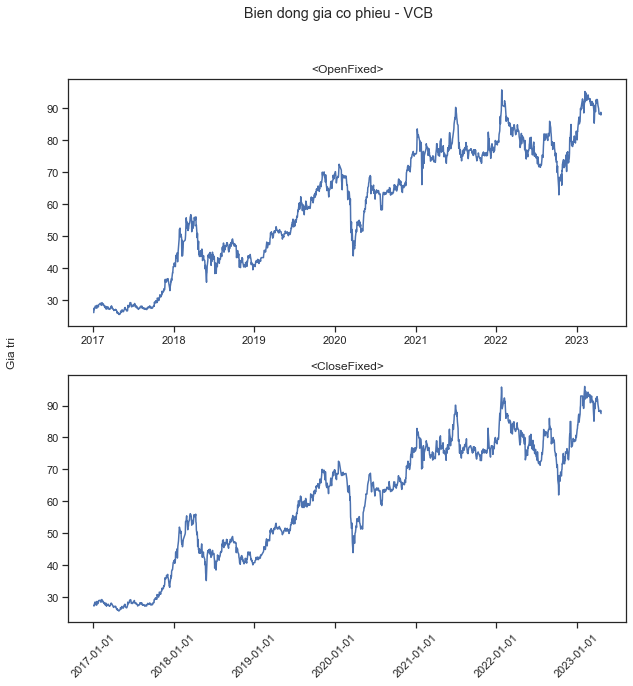

ACB 



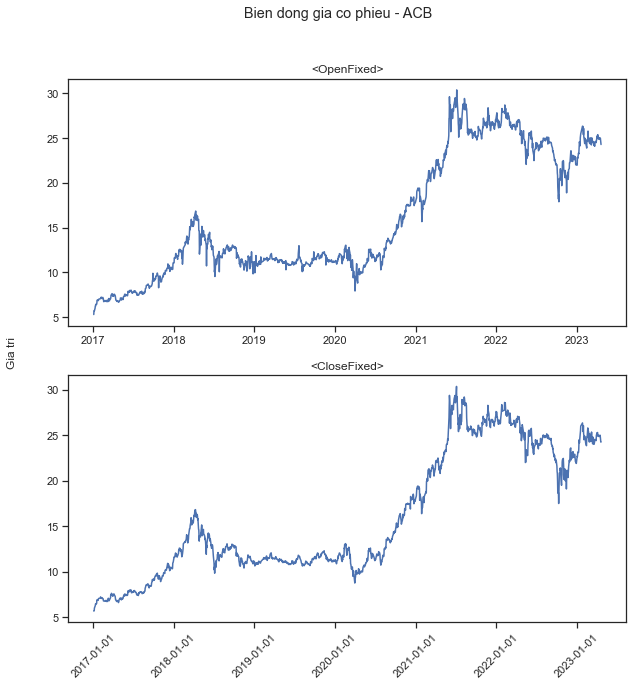

BID 



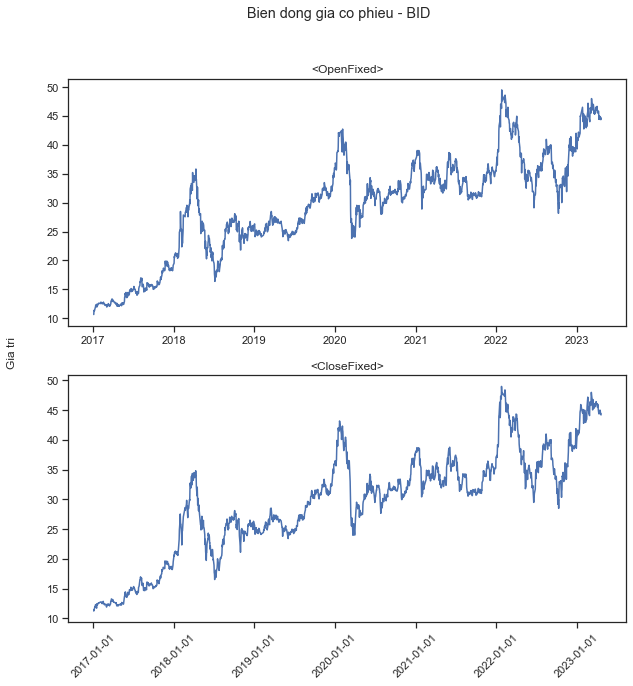

FPT 



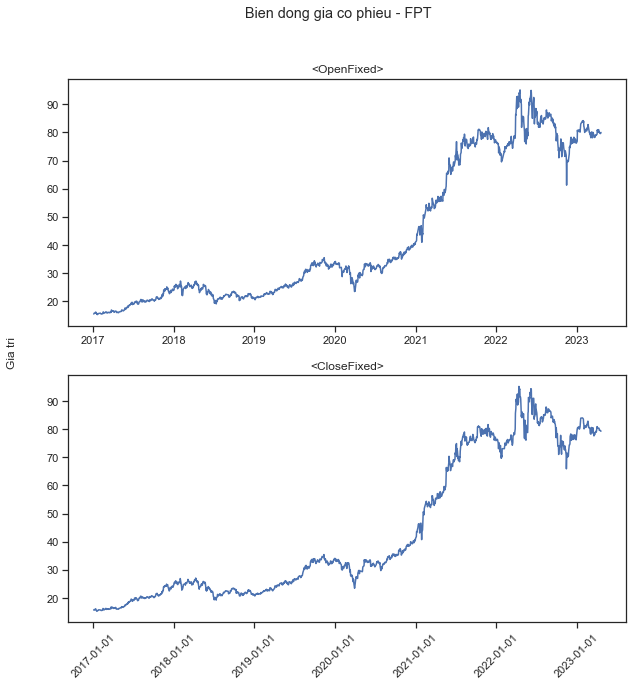

GAS 



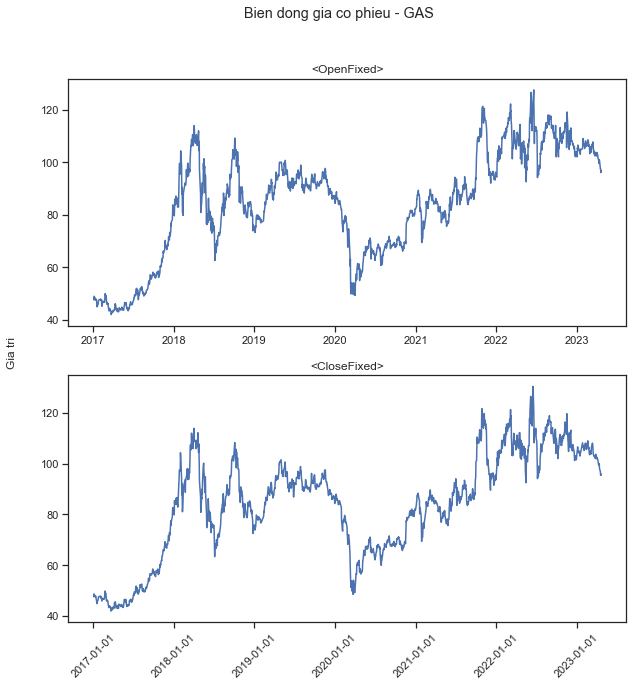

HPG 



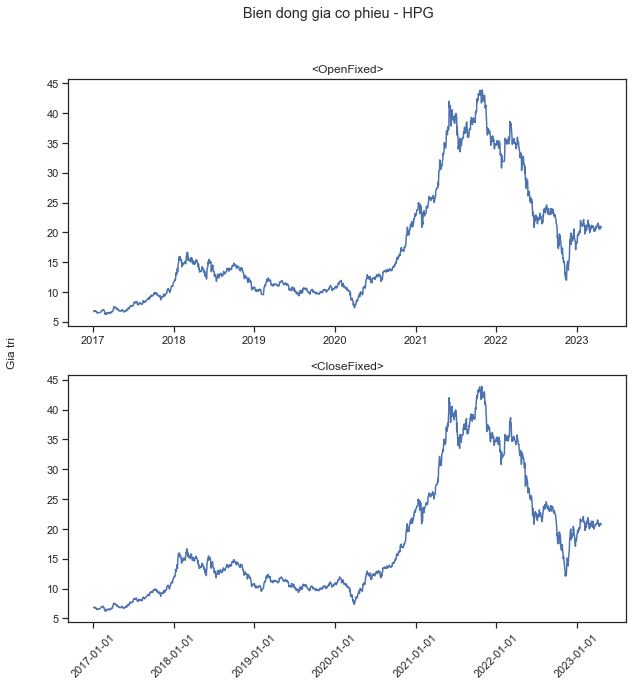

MBB 



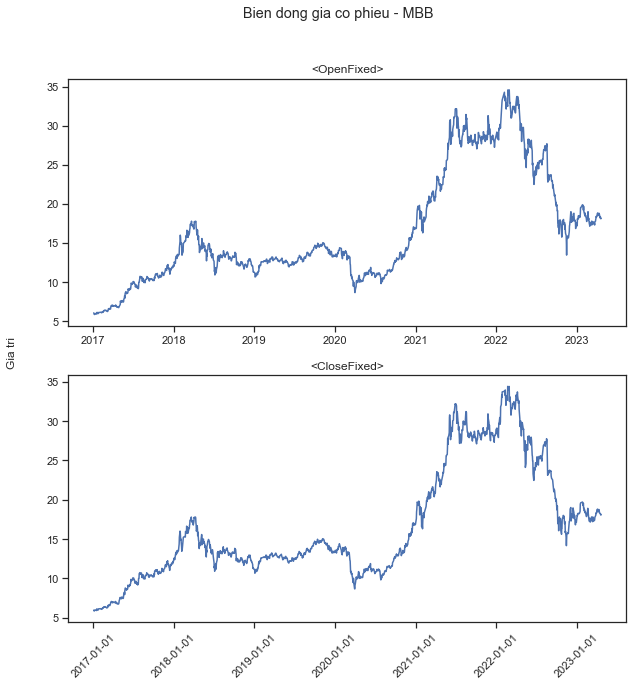

MSN 



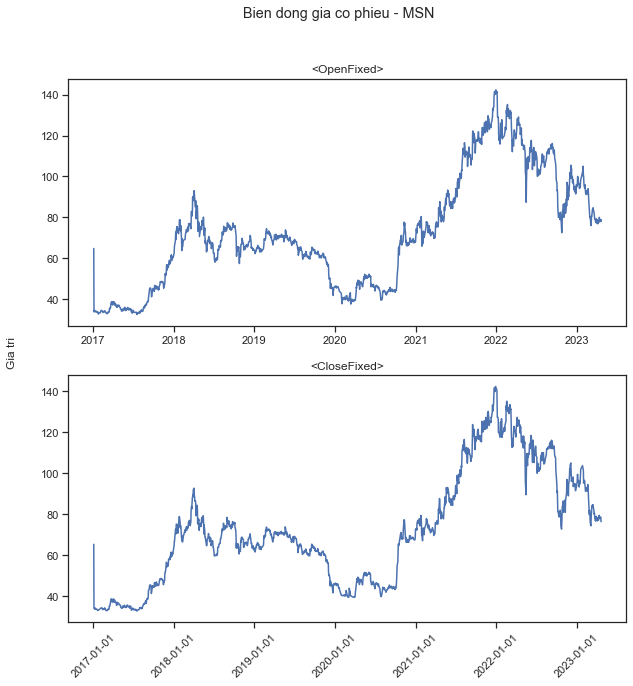

SAB 



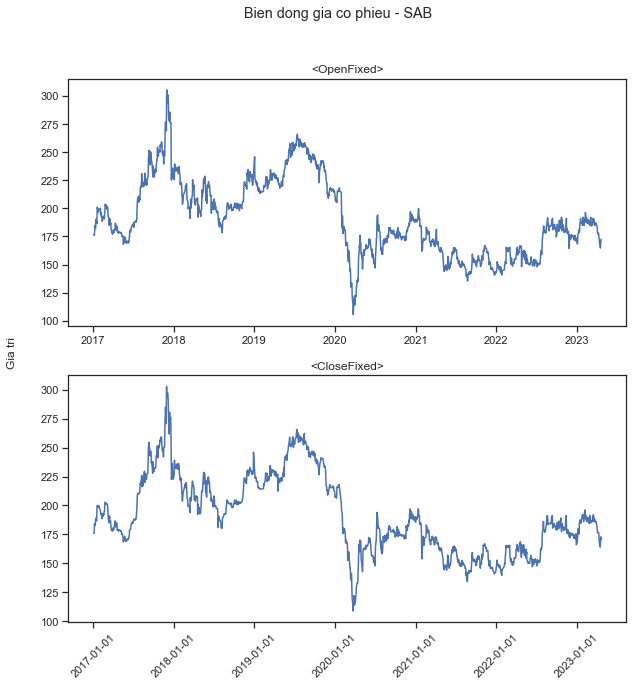

TCB 



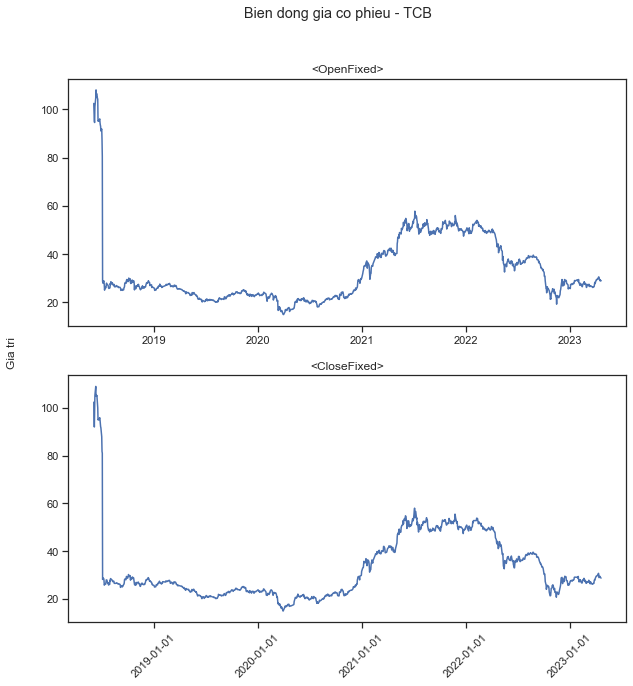

In [98]:
bank_dfs = [vcb_df, acb_df, bid_df, fpt_df, gas_df, hpg_df, mbb_df, msn_df, sab_df, tcb_df]
tickers = ['VCB', 'ACB', 'BID', 'FPT', 'GAS', 'HPG', 'MBB', 'MSN', 'SAB', 'TCB']

for df, ticker in zip(bank_dfs, tickers):
    print(ticker,'\n')
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
    axs[0].plot(df.index, df['<OpenFixed>'])
    axs[0].set_title('<OpenFixed>')
    axs[1].plot(df.index, df['<CloseFixed>'])
    axs[1].set_title('<CloseFixed>')
    fig.text(0.04, 0.5, 'Gia tri', va='center', rotation='vertical')
    fig.suptitle(f'Bien dong gia co phieu - {ticker}')
    date_format = '%Y-%m-%d'
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter(date_format))
    plt.show()

#### Quan sát biểu đồ giá đóng, giá mở theo thời gian, nhận thấy một số cổ phiếu có thể dựa trên thời gian để dự đoán được giá đóng trong tương lai. 
#### Dựa vào độ tương quan cao giữa giá đóng và ngày của tập dữ liệu của cổ phiếu VCB, nhóm thực hiện xây dựng mô hình chuỗi thời gian trên tập dữ liệu này

In [99]:
vcb_df = vcb_df[['<CloseFixed>']] 

### Kiểm tra các yếu tố mùa vụ

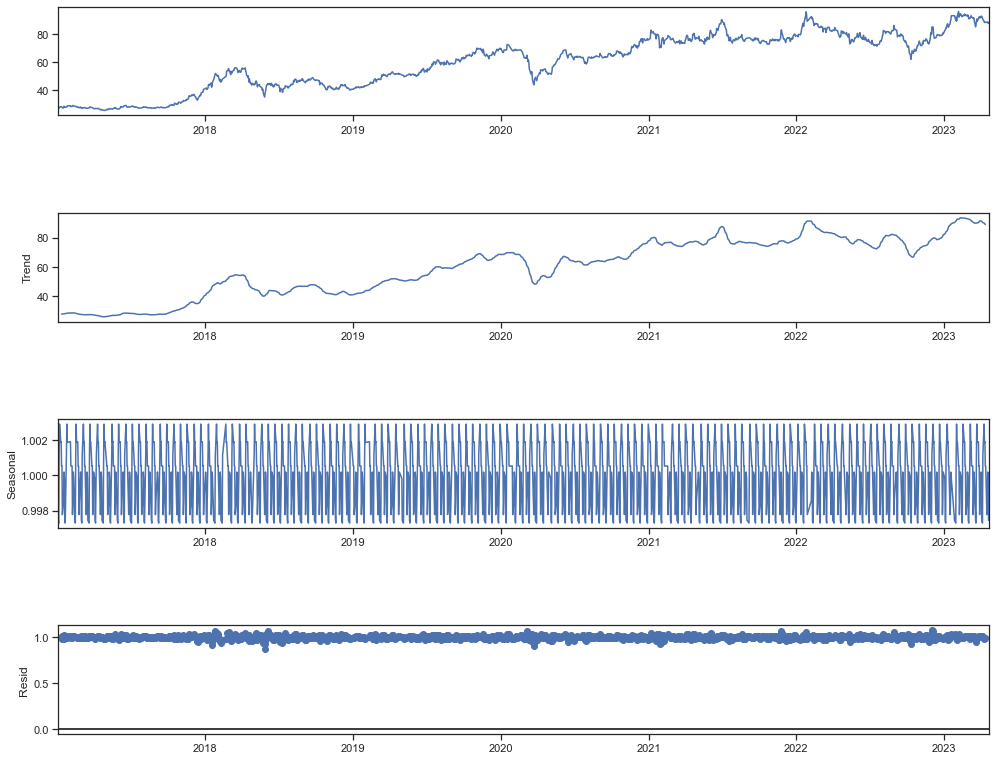

In [100]:
result = seasonal_decompose(vcb_df, model='multiplicative', period=12)
fig = result.plot()
fig.set_size_inches(16, 12)

##### Nhận xét:
- Nhìn chung về dữ liệu không có chu kì theo thời gian trong năm, hay theo xu hướng. Vì vậy dữ liệu không phụ thuộc vào mùa vụ

### Hồi quy mô hình chuỗi thời gian ARIMA (Autoregressive Intergrated Moving Average)

In [101]:
#Xây dựng tập train, test
train, test = vcb_df[vcb_df.index < '2023-04-01'], vcb_df[vcb_df.index >= '2023-04-01']
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (1558, 1)
test shape:  (15, 1)


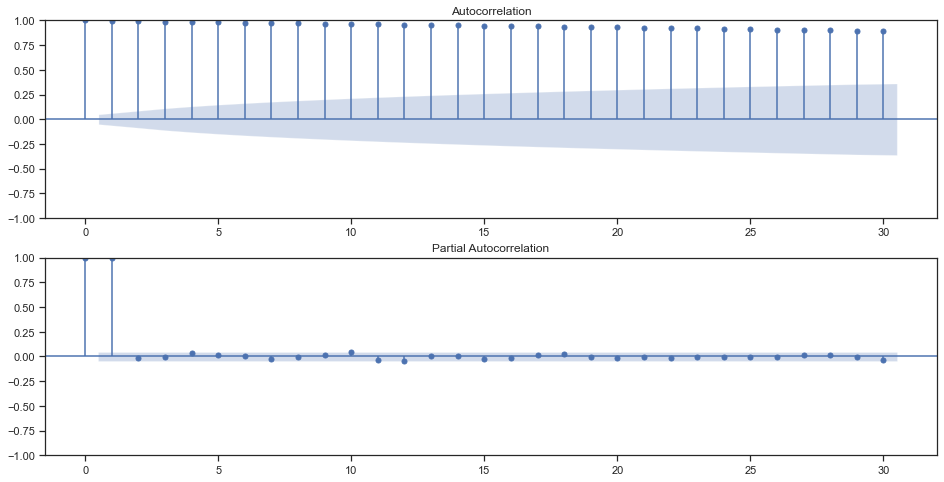

In [105]:
#Vẽ biểu đồ ACF, PACF xác định các chỉ số p,d,q trong mô hình ARIMA
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))

# Đồ thị ACF
plot_acf(train, lags=30, ax=ax1)

# Đồ thị PACF
plot_pacf(train, lags=30, ax=ax2, method='ywm')

plt.show()

##### Phương pháp auto arima đề tự xác định chỉ số p,d,q tốt nhất cho mô hình

In [106]:

model_arima = auto_arima(train, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(model_arima.aic())

C:\Users\Minh\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17315.923, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15201.036, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4857.331, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4859.582, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4859.268, Time=0.59 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=13301.697, Time=0.74 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4861.330, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4856.918, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11573.639, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4858.977, Time=0.45 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4858.838, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13

###### Từ đây ta có mô hình ARIMA tốt nhất là
     y(t) = y(t-1) + e(t)

- Trong đó:

    - y(t) là giá trị tại thời điểm t
    - y(t-1) là giá trị tại thời điểm t-1 (lần sai phân)
    - e(t) là phần dư (residual) của mô hình

In [107]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1558
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -2424.459
Date:                Sun, 21 May 2023   AIC                           4856.918
Time:                        14:21:08   BIC                           4878.323
Sample:                             0   HQIC                          4864.877
                               - 1558                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0667      0.085      0.780      0.435      -0.101       0.234
ar.L1          0.9989      0.001    696.027      0.000       0.996       1.002
ma.L1          0.0135      0.019      0.703      0.4

### Dự đoán giá đóng của cổ phiếu VCB trong 100 ngày tiếp theo 

C:\Users\Minh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


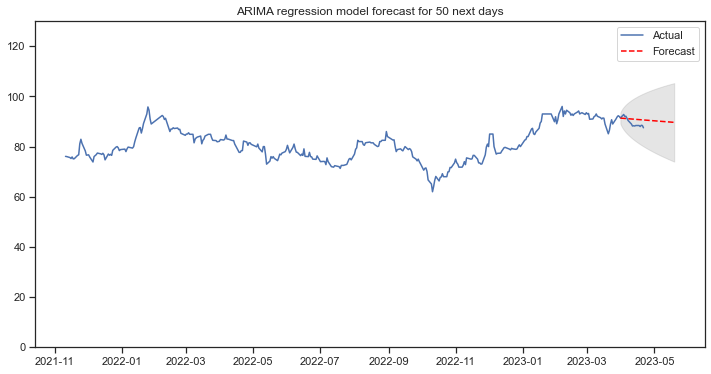

In [108]:
n_pred_perious = 50
fitted, confint = model_arima.predict(n_periods=n_pred_perious, return_conf_int=True)
date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='D')

fitted_seri = pd.Series(fitted.values, index=date)
lower = confint[:, 0]
upper = confint[:, 1]

plt.figure(figsize=(12, 6))
plt.plot(vcb_df[-360:], label='Actual')
plt.plot(fitted_seri, color='red', linestyle='--', label = 'Forecast')
plt.fill_between(date, 
                 lower, 
                 upper,
                 color='grey', alpha=0.2)
plt.ylim((0, 130))
plt.legend()
plt.title('ARIMA regression model forecast for 50 next days')
plt.show()

#### Kết quả dự đoán

In [109]:
print(fitted_seri)

2023-03-31    91.356775
2023-04-01    91.321143
2023-04-02    91.285550
2023-04-03    91.249998
2023-04-04    91.214485
2023-04-05    91.179012
2023-04-06    91.143578
2023-04-07    91.108185
2023-04-08    91.072830
2023-04-09    91.037516
2023-04-10    91.002241
2023-04-11    90.967006
2023-04-12    90.931810
2023-04-13    90.896653
2023-04-14    90.861536
2023-04-15    90.826458
2023-04-16    90.791419
2023-04-17    90.756420
2023-04-18    90.721460
2023-04-19    90.686539
2023-04-20    90.651657
2023-04-21    90.616814
2023-04-22    90.582010
2023-04-23    90.547245
2023-04-24    90.512519
2023-04-25    90.477832
2023-04-26    90.443184
2023-04-27    90.408574
2023-04-28    90.374004
2023-04-29    90.339472
2023-04-30    90.304978
2023-05-01    90.270524
2023-05-02    90.236108
2023-05-03    90.201730
2023-05-04    90.167391
2023-05-05    90.133090
2023-05-06    90.098828
2023-05-07    90.064604
2023-05-08    90.030419
2023-05-09    89.996271
2023-05-10    89.962162
2023-05-11    89

### Kiểm tra tính chính xác của mô hình

In [110]:
def _measure_metric(y, yhat):
    e = y-yhat
    mse=np.mean(e**2)
    rmse=np.sqrt(mse)
    mae=np.mean(np.abs(e))
    mape=np.mean(e/y)
    print('Mean Square Error: {}'.format(mse))
    print('Root Mean Square Error: {}'.format(rmse))
    print('Mean Absolute Error: {}'.format(mae))
    print('Mean Absolute Percentage Error: {}'.format(mape))
    return mse, rmse, mae, mape

mse, rmse, mae, mape=_measure_metric(test.values[0], fitted)

Mean Square Error: 5.544218000048013
Root Mean Square Error: 2.3546163169501764
Mean Absolute Error: 2.300782589185094
Mean Absolute Percentage Error: 0.024792915831735925


###### Dựa vào kết quả ta có:
- RMSE: Biên độ giao động của giá trị dự báo xung quanh giá trị thực tế là 2.35
- MAE: Trung bình sai số giữa giá trị dự báo và giá trị thực tế là 2.3
- MAPE: Sai số giữa giá trị dự báo so với giá trị thực tế bằng 2.48% giá trị thực tế.